<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisar dados de filmes - IMDb #
## Objetivo - Realizar uma análise (básica) dos dados de filmes catalogados na base de dados do IMDb. 
 
  ###  Será analisado somente "Movies" (Dica: use como filtro) 
    
#### 	1.1 ) Quais os filmes com maiores ratings a partir do ano 2000 - salvar em um csv os  1000 mais bem “rankeados”. 

#### 	1.2)  Quais os diretores dos filmes em 1.1 ? 
####         (Print na tela, ou graficamente)

#### 	1.3) Quais os atores principais dos filmes em 1.1)  
####         (Print na tela, ou graficamente)

#### 	1.4)  Listar a intersecção dos filmes obtidos em 1.2 e 1.3 - 
####    (Para encontrar um perfil de combinação diretores + atores = sucesso do filme) 
    
 
    
###       Algumas observações 
 
####       A tabela ratings informa: 
       
####       averageRating – weighted average of all the individual user ratings
####       numVotes - number of votes the title has received
       
####       Como comparar  Filme A -> 9 votos e classificação média = 8.5 
####                      Filme B -> 100 votos e classificação média = 7.4 
                      
                      
                      


###   Desafio: 
    
####    1.5) Faça as análises anteriores considerando alguns gêneros de filmes (Drama,Ação etc) 
####    1.6) Proponha uma ponderação que leve em conta n. de votos recebidos por um filme 
    


In [ ]:
import pandas as pd
import numpy as np


### Carregar os arquivos csv 

#### 1a opção - Faça o download os seguintes arquivos:  title_basics.tsv ; title.crew.tsv;  title.ratings.tsv; name.basics.tsv ; title.principals.tsv (https://www.imdb.com/interfaces/)
##### exemplo : pd.read_csv("title_basics.tsv",sep='\t')

#### 2a opção - Caso, tenham problema para armazenar os arquivos acima. Poderá ser utilizado os arquivos: "IMDb movies.csv", "IMDb names.csv", "IMDb ratings.csv"  e "IMDb title_principals.csv" (https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset). Como não há uma descrição do conteúdo desses arquivos será necessário carregá-los e verificar cada um deles. (Dica: Usem o comando head() para exibir as 5 primeirara linhas). 




### Versão considerando o DB menor ( o indicado pelo Paulo Pestana) 

In [ ]:
### 1a opção e 2a opção 
### Lendo os  e visualizando os seus conteúdos (arquivos tsv ou csv) ### 

df_title_basics = pd.read_csv("IMDb movies.csv")
df_title_basics.head()





/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
df_ratings = pd.read_csv("IMDb ratings.csv")
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
### 1a opção (somente) 
### Filtrar o DataFrame que contém qual o tipo de título de forma a retornar somente os 
### referentes aos filmes

### Ordenar por ranking e salvar os 1000 mais bem rankeados em um arquivo CSV

In [ ]:
### 1a opção (somente) 
### Filtrar para retornar os filmes que foram lançados a partir do ano 2000 
### Talvez seja necessário realizar uma limpeza. Nos meus testes, algumas linhas (startYear)
### estavam preenchidas com '\N'. 




In [ ]:
df_types = df_title_basics.year.map(type)
df_types


#df_title_basics['year'].str.match('[0-9]{4}')

## Retorna os indices da coluna 'year' que não representam colunas de string numéricas
index = df_title_basics['year'].str.match('[A-Z]') 
index
kx=[]
for i in range(len(index)): 
    if index[i] == True:
        kx.append(i)
kx      

# kx = [i for i in range(len(index)) if index[i]==True]  


[83917]

In [ ]:
### 1a opção e 2a opção
### Ordenar por ranking e salvar os 1000 mais bem rankeados em um arquivo CSV
### Print na tela de 5 linhas 

for i in range(len(kx)):
    df_title_basics = df_title_basics.drop(index = kx[i])

df_title_basics[["year"]] = df_title_basics[["year"]].apply(pd.to_numeric)
df_temp = df_title_basics[(df_title_basics['year'] > 1970) & (df_title_basics['country'] == 'USA')]
df_temp_2 = df_temp[(df_temp['avg_vote'] > 7.5)]#  & (df_temp['votes'] > 500)]
                    
df_1000 = df_temp_2 



In [ ]:
df_1000

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
14912,tt0066999,Ispettore Callaghan: il caso 'Scorpio' è tuo!!,Dirty Harry,1971,1972-01-08,"Action, Crime, Thriller",102,USA,English,Don Siegel,...,"Clint Eastwood, Harry Guardino, Reni Santoni, ...","When a madman calling himself ""the Scorpio Kil...",7.7,140624,$ 4000000,$ 35976000,$ 35976000,90.0,362.0,142.0
14948,tt0067093,Il violinista sul tetto,Fiddler on the Roof,1971,1971-12-11,"Drama, Family, Musical",181,USA,"English, Hebrew, Russian",Norman Jewison,...,"Topol, Norma Crane, Leonard Frey, Molly Picon,...","In prerevolutionary Russia, a Jewish peasant c...",8.0,38350,$ 9000000,$ 10404330,$ 10404330,67.0,170.0,74.0
14960,tt0067116,Il braccio violento della legge,The French Connection,1971,1972-03-03,"Action, Crime, Drama",104,USA,"English, French",William Friedkin,...,"Gene Hackman, Fernando Rey, Roy Scheider, Tony...",A pair of NYC cops in the Narcotics Bureau stu...,7.7,107402,$ 1800000,$ 51700000,$ 51700000,94.0,328.0,165.0
14987,tt0067185,Harold e Maude,Harold and Maude,1971,1974-04-23,"Comedy, Drama, Romance",91,USA,English,Hal Ashby,...,"Ruth Gordon, Bud Cort, Vivian Pickles, Cyril C...","Young, rich, and obsessed with death, Harold f...",7.9,69468,$ 1200000,NaN,NaN,62.0,342.0,94.0
15016,tt0067277,E Johnny prese il fucile,Johnny Got His Gun,1971,1975-04-17,"Drama, War",111,USA,English,Dalton Trumbo,...,"Timothy Bottoms, Kathy Fields, Marsha Hunt, Ja...","In this tragic, dark, anti-war satire, a patri...",7.9,15306,$ 1000000,NaN,$ 2735,71.0,89.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85093,tt9071322,Cattive acque,Dark Waters,2019,2020-02-20,"Biography, Drama, History",126,USA,"English, Korean",Todd Haynes,...,"Mark Ruffalo, Anne Hathaway, Tim Robbins, Bill...",A corporate defense attorney takes on an envir...,7.6,45064,NaN,$ 11136084,$ 21898901,73.0,334.0,186.0
85141,tt9106768,Michael Jackson: Smooth Criminal (II),Michael Jackson: Smooth Criminal (II),1988,1988-10-29,"Action, Crime, Fantasy",48,USA,English,Colin Chilvers,...,"Brandon Quintin Adams, Michael Jackson, Sean L...",Michael tried to protect three children as he ...,8.4,352,$ 22000000,NaN,NaN,NaN,NaN,NaN
85151,tt9112712,Breaking Fast,Breaking Fast,2020,2020-03-07,"Comedy, Drama",92,USA,"English, Arabic",Mike Mosallam,...,"Veronica Cartwright, Michael Cassidy, Haaz Sle...","Mo, a practicing Muslim living in West Hollywo...",7.7,112,NaN,NaN,NaN,NaN,1.0,3.0
85518,tt9509866,The Guy Who Didn't Like Musicals,The Guy Who Didn't Like Musicals,2018,2018-12-23,"Comedy, Musical",112,USA,English,Nick Lang,...,"Jon Matteson, Lauren Lopez, Joey Richter, Jaim...","Paul is an average guy. He likes movies, and p...",8.7,330,$ 130000,NaN,NaN,NaN,4.0,NaN


In [ ]:
### 1a opção e 2a opção 
### Dado o resultado obtido, anteriormente, obter um Dataframe que contenha os diretores dos 1000 filmes
### além das informações dos filmes (que vocês julgarem necessárias,tais como: título, ano de lançamento, genero ...). 
### Dica: se os dados de diretores estiverem em uma tabela separada, 
### usar o indexador comum as tabelas. 
### Print na tela de 5 linhas

df_diretores = df_1000[['original_title','director','actors']]
df_diretores_groupby = df_diretores.groupby('director').size()
df_diretores_groupby
df_diretores_groupby.sort_values(ascending=False)
#len(df_diretores)

director
Steven Spielberg      12
Martin Scorsese        9
Woody Allen            7
Rob Reiner             7
Clint Eastwood         6
                      ..
Mann Robinson          1
Malindi Fickle         1
M. Night Shyamalan     1
Louis Malle            1
Aaron K. Carter        1
Length: 319, dtype: int64

In [ ]:
#### Exatamente o que foi feito anteriormente, mas como resultado um Dataframe que contenha os atores principais
#### Considerem, inicialmente, somente 1 ator principal. 
#### Print na tela de 5 linhas 
df_atores = df_1000[['original_title','director','actors']].dropna()
df_atores['actors'] = df_1000['actors'].str.split(',')

df_atores.reset_index(inplace=True, drop=True)
df_atores.actors



0      [Clint Eastwood,  Harry Guardino,  Reni Santon...
1      [Topol,  Norma Crane,  Leonard Frey,  Molly Pi...
2      [Gene Hackman,  Fernando Rey,  Roy Scheider,  ...
3      [Ruth Gordon,  Bud Cort,  Vivian Pickles,  Cyr...
4      [Timothy Bottoms,  Kathy Fields,  Marsha Hunt,...
                             ...                        
448    [Mark Ruffalo,  Anne Hathaway,  Tim Robbins,  ...
449    [Brandon Quintin Adams,  Michael Jackson,  Sea...
450    [Veronica Cartwright,  Michael Cassidy,  Haaz ...
451    [Jon Matteson,  Lauren Lopez,  Joey Richter,  ...
452    [Buzz Aldrin,  Bill Anders,  Neil Armstrong,  ...
Name: actors, Length: 453, dtype: object

In [ ]:
A = df_atores['actors'].values

for i in range(len(A)):
    df_atores['actors'][i] = A[i][0]

df_atores


,original_title,director,actors
0,Dirty Harry,Don Siegel,Clint Eastwood
1,Fiddler on the Roof,Norman Jewison,Topol
2,The French Connection,William Friedkin,Gene Hackman
3,Harold and Maude,Hal Ashby,Ruth Gordon
4,Johnny Got His Gun,Dalton Trumbo,Timothy Bottoms
...,...,...,...
448,Dark Waters,Todd Haynes,Mark Ruffalo
449,Michael Jackson: Smooth Criminal (II),Colin Chilvers,Brandon Quintin Adams
450,Breaking Fast,Mike Mosallam,Veronica Cartwright
451,The Guy Who Didn't Like Musicals,Nick Lang,Jon Matteson


In [ ]:
#### Desafios  (Se quiserem fazer)

### Faça as análises anteriores considerando alguns gêneros de filmes (Drama,Ação etc)

In [ ]:
df_atores['Director-Actor'] = df_atores['director'] + "," +  df_atores['actors']

df_atores

,original_title,director,actors,Director-Actor
0,Dirty Harry,Don Siegel,Clint Eastwood,"Don Siegel,Clint Eastwood"
1,Fiddler on the Roof,Norman Jewison,Topol,"Norman Jewison,Topol"
2,The French Connection,William Friedkin,Gene Hackman,"William Friedkin,Gene Hackman"
3,Harold and Maude,Hal Ashby,Ruth Gordon,"Hal Ashby,Ruth Gordon"
4,Johnny Got His Gun,Dalton Trumbo,Timothy Bottoms,"Dalton Trumbo,Timothy Bottoms"
...,...,...,...,...
448,Dark Waters,Todd Haynes,Mark Ruffalo,"Todd Haynes,Mark Ruffalo"
449,Michael Jackson: Smooth Criminal (II),Colin Chilvers,Brandon Quintin Adams,"Colin Chilvers,Brandon Quintin Adams"
450,Breaking Fast,Mike Mosallam,Veronica Cartwright,"Mike Mosallam,Veronica Cartwright"
451,The Guy Who Didn't Like Musicals,Nick Lang,Jon Matteson,"Nick Lang,Jon Matteson"


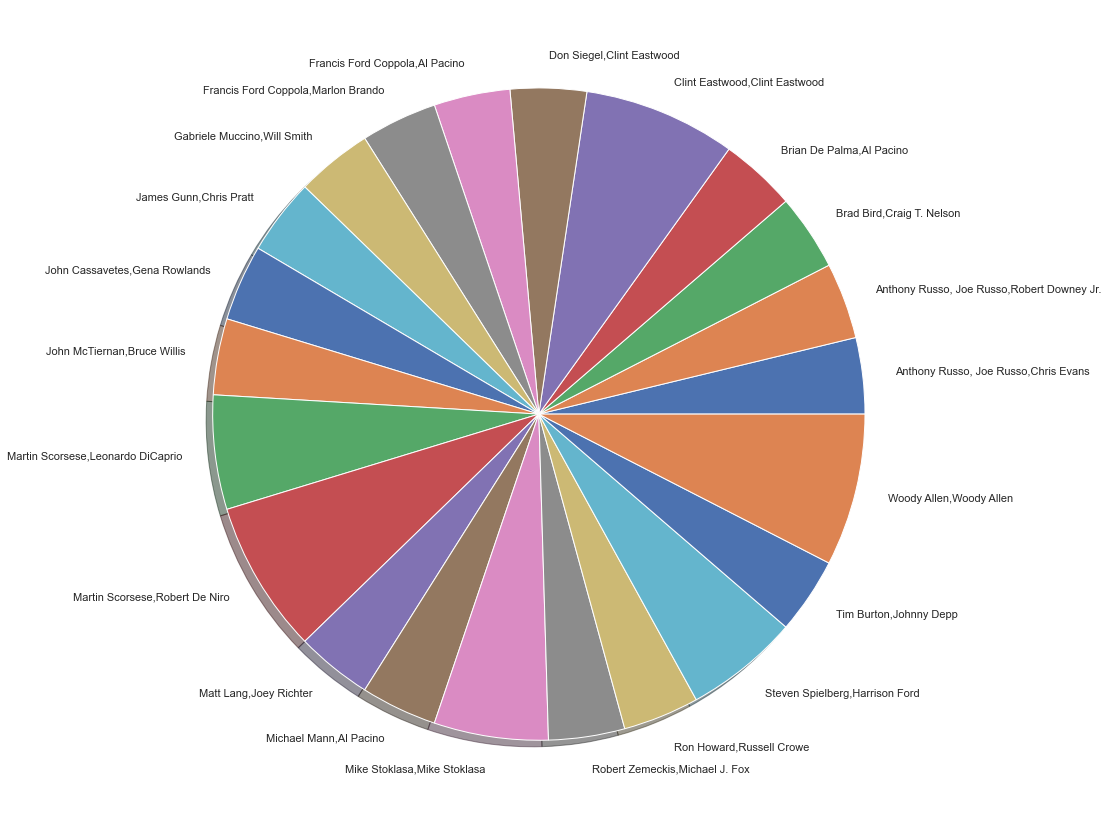

In [ ]:
import pylab
df_g = df_atores.groupby(df_atores['Director-Actor']).size()

#df_g.sort_values('original_title',ascending=False)

df_g.to_csv('Director-Actor')
df_g.sort_values(ascending=False) 
df_g = df_g[(df_g.values >= 2) ]
#df_g.plot.pie(y='',figsize=(5, 5))
df_g.plot(kind='pie', shadow=True)
pylab.ylabel('')
pylab.show()


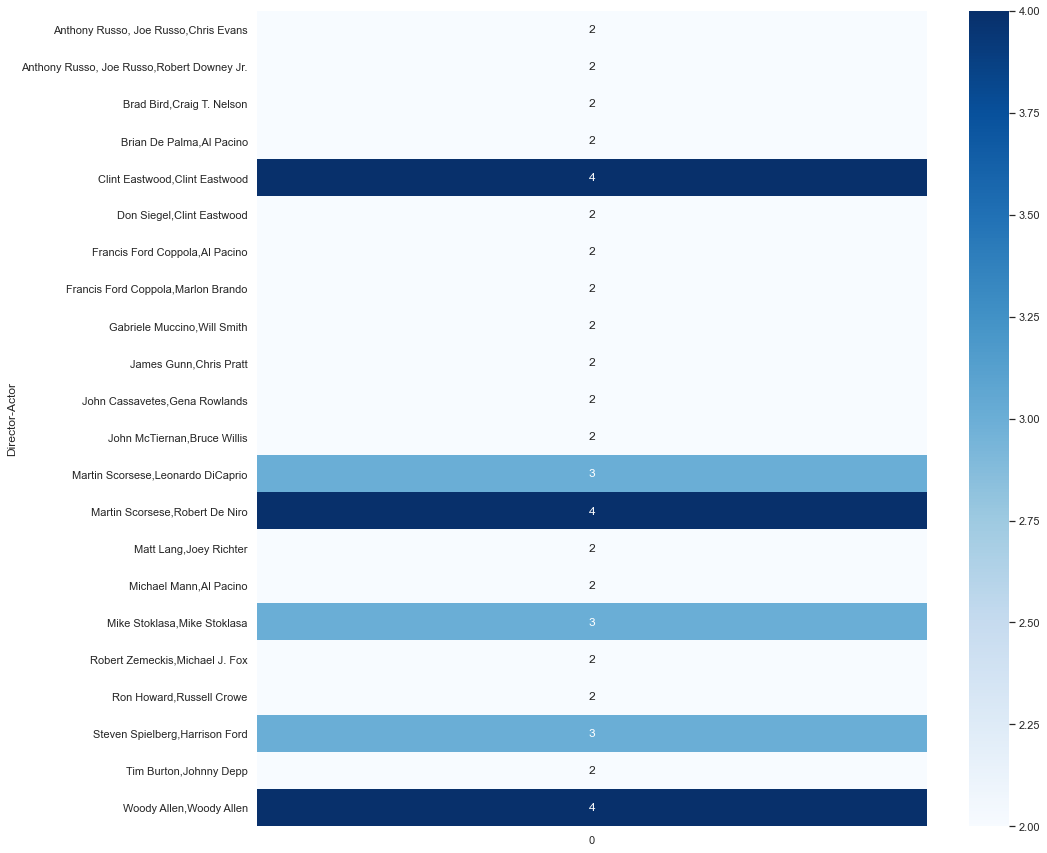

In [ ]:
df_test = pd.DataFrame(df_g)
df_test
import seaborn as sns
sns.set(rc={"figure.figsize":(15,15)})


g = sns.heatmap(df_test, cmap="Blues", annot=True, fmt='g')
g.get_figure().savefig("heatmap.png")

In [ ]:
#A = df_g.get(df_g.index[3000])
key = df_g.index[0]
Lst_Dir_Acts = []
for i in range(len(df_g)):
    if df_g.get(df_g.index[i]) >= 2: 
        Lst_Dir_Acts.append(df_g.index[i])
        
        
#df.at[4, 'B']

In [ ]:
#### Desafios  (Se quiserem fazer)

### Proponha uma ponderação que leve em conta n. de votos recebidos por um filme e refaça
### as análises anteriores.

In [ ]:
Lst_Dir_Acts


['Anthony Russo, Joe Russo,Chris Evans',
 'Anthony Russo, Joe Russo,Robert Downey Jr.',
 'Brad Bird,Craig T. Nelson',
 'Brian De Palma,Al Pacino',
 'Clint Eastwood,Clint Eastwood',
 'Don Siegel,Clint Eastwood',
 'Francis Ford Coppola,Al Pacino',
 'Francis Ford Coppola,Marlon Brando',
 'Gabriele Muccino,Will Smith',
 'James Gunn,Chris Pratt',
 'John Cassavetes,Gena Rowlands',
 'John McTiernan,Bruce Willis',
 'Martin Scorsese,Leonardo DiCaprio',
 'Martin Scorsese,Robert De Niro',
 'Matt Lang,Joey Richter',
 'Michael Mann,Al Pacino',
 'Mike Stoklasa,Mike Stoklasa',
 'Robert Zemeckis,Michael J. Fox',
 'Ron Howard,Russell Crowe',
 'Steven Spielberg,Harrison Ford',
 'Tim Burton,Johnny Depp',
 'Woody Allen,Woody Allen']

In [ ]:
dictA={}
filmes = df_atores[df_atores['Director-Actor'] == Lst_Dir_Acts[0]].original_title
print(filmes.values[1])
print(Lst_Dir_Acts[0])
for i in range(len(Lst_Dir_Acts)):
    filmes = df_atores[df_atores['Director-Actor'] == Lst_Dir_Acts[i]].original_title
    k = 0
    
    for j in range(len(filmes.values)):
        if k==0:
            dictA[Lst_Dir_Acts[i]] = {filmes.values[j]}
            k=1
        else:
            dictA[Lst_Dir_Acts[i]].add(filmes.values[j])
        
                    
dictA    

Captain America: Civil War
Anthony Russo, Joe Russo,Chris Evans


{'Anthony Russo, Joe Russo,Chris Evans': {'Captain America: Civil War',
  'Captain America: The Winter Soldier'},
 'Anthony Russo, Joe Russo,Robert Downey Jr.': {'Avengers: Endgame',
  'Avengers: Infinity War'},
 'Brad Bird,Craig T. Nelson': {'Incredibles 2', 'The Incredibles'},
 'Brian De Palma,Al Pacino': {"Carlito's Way", 'Scarface'},
 'Clint Eastwood,Clint Eastwood': {'Million Dollar Baby',
  'The Bridges of Madison County',
  'The Outlaw Josey Wales',
  'Unforgiven'},
 'Don Siegel,Clint Eastwood': {'Dirty Harry', 'Escape from Alcatraz'},
 'Francis Ford Coppola,Al Pacino': {'The Godfather: Part II',
  'The Godfather: Part III'},
 'Francis Ford Coppola,Marlon Brando': {'Apocalypse Now', 'The Godfather'},
 'Gabriele Muccino,Will Smith': {'Seven Pounds', 'The Pursuit of Happyness'},
 'James Gunn,Chris Pratt': {'Guardians of the Galaxy',
  'Guardians of the Galaxy Vol. 2'},
 'John Cassavetes,Gena Rowlands': {'Love Streams', 'Opening Night'},
 'John McTiernan,Bruce Willis': {'Die Hard',

In [ ]:
df = pd.DataFrame(dictA.items(),columns=['Director-actor', 'Movies'])
df

,Director-actor,Movies
0,"Anthony Russo, Joe Russo,Chris Evans","{Captain America: The Winter Soldier, Captain ..."
1,"Anthony Russo, Joe Russo,Robert Downey Jr.","{Avengers: Endgame, Avengers: Infinity War}"
2,"Brad Bird,Craig T. Nelson","{Incredibles 2, The Incredibles}"
3,"Brian De Palma,Al Pacino","{Scarface, Carlito's Way}"
4,"Clint Eastwood,Clint Eastwood","{Unforgiven, Million Dollar Baby, The Bridges ..."
5,"Don Siegel,Clint Eastwood","{Escape from Alcatraz, Dirty Harry}"
6,"Francis Ford Coppola,Al Pacino","{The Godfather: Part II, The Godfather: Part III}"
7,"Francis Ford Coppola,Marlon Brando","{The Godfather, Apocalypse Now}"
8,"Gabriele Muccino,Will Smith","{Seven Pounds, The Pursuit of Happyness}"
9,"James Gunn,Chris Pratt","{Guardians of the Galaxy, Guardians of the Gal..."
